In [1]:
!python --version

Python 3.11.5


***
***

<div class="alert alert-block alert-warning">

***Check your kernels before starting!***
    
<p style="text-align:center;">
        <img src=Images/Best_Practice.png width=500 class="center">
</p>

</div>

***
***

<div class="alert alert-danger">

## Before you continue!

Before we get started, let's first install the modules we'll be using. To do this, navigate to the Launcher tab and open a new Terminal. Run this command:
    
```python
pip3 install --user 'python-louvain' 'ndlib' --upgrade 'scipy' 'networkx'
```
    
<p style="text-align:center;">
        <img src=Images/Launch_Terminal.png width=500 class="center">
</p>


Finally, re-open this Notebook.
    
***NOTE 1:*** You only need to install once!

***NOTE 2:*** This will take a few minutes... (be patient!)
    
</div>

In [17]:
!pip install --user python-louvain ndlib --upgrade scipy networkx

     ---------------------------------------- 0.0/110.2 kB ? eta -:--:--
     --- ------------------------------------ 10.2/110.2 kB ? eta -:--:--
     ---------- -------------------------- 30.7/110.2 kB 262.6 kB/s eta 0:00:01
     ------------- ----------------------- 41.0/110.2 kB 281.8 kB/s eta 0:00:01
     ------------------------------------ 110.2/110.2 kB 584.8 kB/s eta 0:00:00
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/43/d0/f3cd75b62e1b90f48dbf091261b2fc7ceec14a700e308c50f6a69c83d337/scipy-1.11.4-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 3.1 MB/s eta 0:00:00
  Obtaining dependency information for networkx from https://files.pythonhosted.org/packages/d5/f0/8fbc882ca80cf077f1b246c0e3c3465f7f415439bdea6b899f6b19f61f70/networkx-3.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for python-igraph fr

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


***
***

<div class = "alert alert-info">

## <p style="text-align: center;">Community Detection</p> ## 


<p style="text-align:center;">
        <img src="Images/13_Network_Communities.png" width=750 class="center">
</p>

Facebook data are a great place to start to study community detection analysis in social networks. Why? Think about your Facebook friends. They probably come from different aspects of your life: Some are your friends from college, others are your co-workers, and maybe some old friends from your hometown.

Because your friends can be broken down into different groups like this, you may wonder if we could identify these different communities in your social network. Using community detection algorithms, we can break down a social network into different potentially overlapping communities. For instance, consider the image above of two hypothetical networks, where "communities" of nodes are distinctly color-coded. Notice that in many ways, these communities are both distinct and overlap. This could be the overlap of highschool and hometown friends, or college friends and graduate school friends, etc.

There are a bunch of different strategies for finding communities in social network data. Like we've discussed with other methods in data science, the right way to detect communities depends on what intuition you have about your data. The algorithms that distinguish one community detection method from another, in particular, vary by what structural features they emphasize in the network. For instance, for the two we're going to talk about right now are:

- Modularity maximization tries to maximize the number of edges within a cluster, and minimize the number of edges going between clusters
- Clique percolation focuses on fully connected sets of nodes (i.e. cliques)

</div>

***

## Modularity Maximization
Let's start with the more popular, modularity maximization. The main criterion for finding good communities here is that we want to maximize intra-community edges while minimizing inter-community edges. Formally, the algorithm tries to maximize the modularity of network, or the fraction of edges that fall within a community minus the expected fraction of edges if the edges were distributed by random. Good communities should have a high number of intra-community edges, so by maximizing the modularity, we detect dense communities that have a high fraction of intra-community edges.

**Important notes:**
1. Modularity maximization is popular because it is fast (relatively speaking). Community detection takes loads of computing power, and the simplicity of modularity maximization makes it faster to implement.
2. **But** modularity maximization has serious flaws. It has trouble finding small communities (this has been called its [resolution limit](http://www.pnas.org/content/104/1/36)), and worse, modularity does not always have a global maximum, leading to an almost infinite number of "right" solutions according to modularity maximization (see [this paper](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.81.046106) if you're curious). How badly this is going to affect your work depends on the size of your network and the types of communities you are expecting. Unless computing power is a limiting factor, it's usually better to avoid using this approach.

Still, modularity maximization is probably the most popular community detection scheme out there, so you are better off knowing what it is. We're going to use the `community` module, provided for you as a folder in your Notebook directory. We're also going to read in `NetworkX` and `matplotlib` for when we plot these networks. We're also going to suppress any warning messages we get from plotting these networks. 

In [3]:
import networkx as nx
import community
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

Let's read in some Facebook data. These data are from SNAP (Stanford Network Analysis Project). They were collected data from a survey of Facebook users. 

(More information here: https://snap.stanford.edu/data/egonets-Facebook.html.) 

These data are very large, so many of things that we're going to run will probably take a bit longer than usual. 

In [4]:
G_fb = nx.read_edgelist("Data/facebook_combined.txt", 
                        create_using = nx.Graph(), 
                        nodetype = int)

Let's get some basic information from these data. 

This network is pretty large.  

In [5]:
print('Number of nodes', len(G_fb.nodes))
print('Number of edges', len(G_fb.edges))
print('Average degree', sum(dict(G_fb.degree).values()) / len(G_fb.nodes))

Number of nodes 4039
Number of edges 88234
Average degree 43.69101262688784


First, let's plot this network. Let's do it using a "spring layout," like the one we learned about last week.

First, let's take a look at the network. Create network layout for visualizations. 

**N.B.: This will take a few minutes to run!**

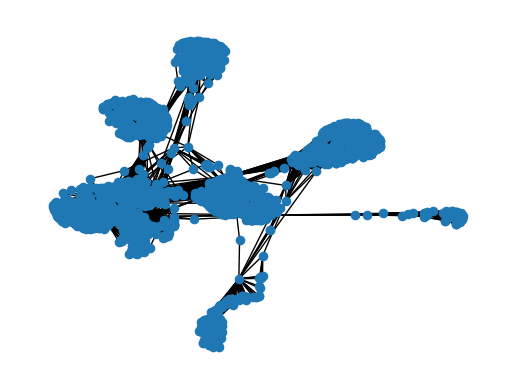

In [6]:
spring_pos = nx.spring_layout(G_fb)
plt.axis("off")
nx.draw_networkx(G_fb, 
                 pos = spring_pos, 
                 with_labels = False, 
                 node_size = 35)

Let's run a community detection analysis from the package `community` (because NetworkX made the decision to not even support modularity maximization in its package) and cluster nodes together. First we're going to run the function called `.best_partition()` from `community` on `G_fb`, our `NetworkX` object. 

In [7]:
mod_communities = community.best_partition(G_fb)

Let's take a look at what's in the `mod_communities` object now. It looks like a really long dictionary. In fact, it's a dictionary where all of the keys are nodes in the network, `G_fb`. The values correspond to its community assignment. 

Let's extract the values (i.e., communities) from this `dictionary` and use a list and a set to find all of the unique values. This will give us a list of all of the communities that the algorithm detected. 

We see that it found a total of 16 communities, which it numbered from 0 to 15. 

In [8]:
list(set(list(mod_communities.values())))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

Now, let's create a list for each node, indicating which "community" it happens to be in. Let's save this as `mod_values`. For every node in `G_fb` &mdash; designated by `G_fb.nodes()` &mdash; loop through each one and return its corresponding community allocation. 

Since `mod_communities` is a `dictionary`, we can use `mod_communities.get()` to return the community ID (e.g., 0 through 15). We just have to pass in the node (as the key) to get the community ID (which returns the key's value). 

In [9]:
mod_values = [mod_communities.get(node) for node in G_fb.nodes()]

Now, let's draw the exact same network again, but let's color in the nodes based on which community they belong to using the list `values` that we just defined. 


In [10]:
import numpy as np
import matplotlib.pyplot as plt

Take a look and see how well the modularity maximization method did at finding these hidden groups.

We're going to use a custom made package in your `/Data/` folder called `Community_Layout` coded as 


```python
Code.Community_Layout
```

then pass in our function `community_layout()`, passing in our network `G_fb` and the communities we detected `mod_communities`, and then plot we'll color in (and position) the nodes from the graph based on what community it belongs to. 

You'll see a nice separation! What do you notice about these groups?

**N.B.: This may take a few minutes to run!**

In [11]:
from Code.Community_Layout import community_layout

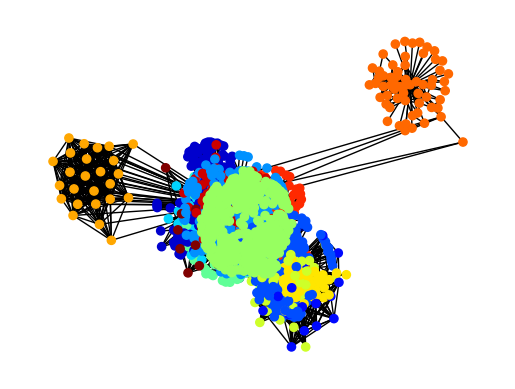

In [12]:
plt.axis("off")
nx.draw_networkx(G_fb, 
                 pos = community_layout(G_fb, mod_communities), #This is our function community_layout()
                 cmap = plt.get_cmap("jet"), 
                 node_color = mod_values, # Let's color the node based on which community it happens to be in. 
                 node_size = 35, 
                 with_labels = False)

***
***

<div class="alert alert-block alert-success">

# Checkpoint 1

Now you try!
    
Use the Star Wars graph from the last lab `SW_G` and let's see what communities we can uncover. 

```python
Star_Wars_df = pd.read_csv("Data/star-wars-network-edges.csv")

SW_G = nx.from_pandas_edgelist(Star_Wars_df, # The DataFrame
                              'source', # The sender column
                              'target', # The receiver column
                              edge_attr='weight') # Column with the weight

```

Use the function provided here `community_layout()` and pass in the Stars Wars graph and the partitions from `community.best_partition()` to plot the Star Wars graph based on each node's community assignment. 

In [52]:
Star_Wars_df = pd.read_csv("Data/star-wars-network-edges.csv")

In [53]:
SW_G = nx.from_pandas_edgelist(Star_Wars_df, # The DataFrame
                              'source', # The sender column
                              'target', # The receiver column
                              edge_attr='weight') # Column with the weight

In [60]:
print('Number of nodes', len(SW_G.nodes))
print('Number of edges', len(SW_G.edges))
print('Average degree', sum(dict(SW_G.degree).values()) / len(G_fb.nodes))

Number of nodes 21
Number of edges 60
Average degree 0.029710324337707355


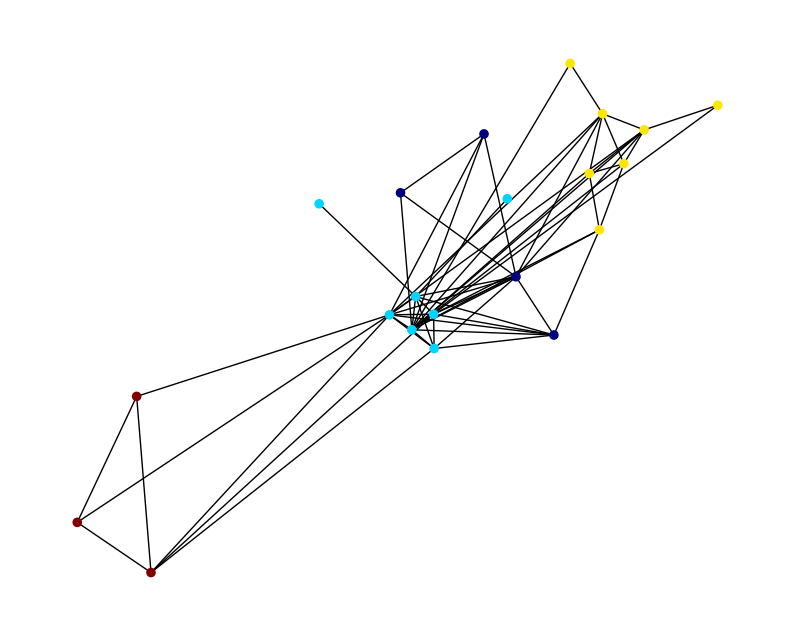

In [65]:

# Detect communities using community.best_partition
partitions = community.best_partition(SW_G)

# Plot the Star Wars graph based on community assignments
plt.figure(figsize=(10, 8))
plt.axis("off")

# Use the community_layout function for a better layout
pos = community_layout(SW_G, partitions)

# Draw the network with community colors
nx.draw_networkx(SW_G,
                 pos=pos,
                 cmap=plt.get_cmap("jet"),
                 node_color=list(partitions.values()),
                 node_size=35,
                 with_labels=False)

plt.show()

***
***

## Communities and Nodes and Their Attributes

Visualizations are great, but where community detection is helpful is to see what types of nodes cluster together, especially if you have node attributes (e.g., gender, age, etc.). 

We can again use `mod_communities.get(node)` to extract the community assigned to each node. 

In [66]:
mod_nodes_df = pd.DataFrame.from_dict({node:mod_communities.get(node) for node in G_fb.nodes()},
                                  orient='index',
                                  columns=["Community_ID"]).rename_axis('Node_ID').reset_index()

Let's take a quick peek. 

In [67]:
mod_nodes_df

,Node_ID,Community_ID
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
4034,4034,12
4035,4035,12
4036,4036,12
4037,4037,12


In [76]:
mod_nodes_df['Community_ID'].unique()

array([ 0,  1,  7,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15,  2],
      dtype=int64)

***
***

<div class="alert alert-block alert-success">

# Checkpoint 2

Now you try!
    
Use the Star Wars network again `SW_G` and create a similar `DataFrame`. Here, however, we have node names! Are there any patterns that you notice?


In [68]:
Star_Wars_df.head()

,source,target,weight
0,C-3PO,R2-D2,17
1,LUKE,R2-D2,13
2,OBI-WAN,R2-D2,6
3,LEIA,R2-D2,5
4,HAN,R2-D2,5


In [69]:
SW_G = nx.from_pandas_edgelist(Star_Wars_df, # The DataFrame
                              'source', # The sender column
                              'target', # The receiver column
                              edge_attr='weight') # Column with the weight

In [70]:
mod_nodes_df2 = pd.DataFrame.from_dict({node:mod_communities.get(node) for node in SW_G.nodes()},
                                  orient='index',
                                  columns=["Community_ID"]).rename_axis('Node_ID').reset_index()

In [73]:
mod_nodes_df2.head()

,Node_ID,Community_ID
0,C-3PO,None
1,R2-D2,None
2,LUKE,None
3,OBI-WAN,None
4,LEIA,None


In [74]:
mod_nodes_df2.tail()

,Node_ID,Community_ID
16,JABBA,None
17,GOLD LEADER,None
18,WEDGE,None
19,RED LEADER,None
20,RED TEN,None


In [75]:
mod_nodes_df2['Community_ID'].unique()

array([None], dtype=object)

In [77]:
mod_nodes_df2['Node_ID'].unique()

array(['C-3PO', 'R2-D2', 'LUKE', 'OBI-WAN', 'LEIA', 'HAN', 'CHEWBACCA',
       'DODONNA', 'DARTH VADER', 'CAMIE', 'BIGGS', 'BERU', 'OWEN',
       'MOTTI', 'TARKIN', 'GREEDO', 'JABBA', 'GOLD LEADER', 'WEDGE',
       'RED LEADER', 'RED TEN'], dtype=object)

***
***

<div class = "alert alert-info">

## <p style="text-align: center;">Network Regression Models: MRQAP</p> ## 

(Source - https://dshizuka.github.io/networkanalysis/07_mrqap.html)


<p style="text-align:center;">
        <img src="Images/Linear_Regression_Model.png" width=500 class="center">
</p>

Perhaps the most common class of statistical models both computational social scientists and social scientists employ is the linear regression model (e.g., OLS, GLM, etc.). 
    
The above equation is an example of a linear model, with your **dependent variable** (Y) and your **independent** (or **explanatory variables**, Xs). The **beta coefficients** are the marginal changes in each variable, ***ceteris paribus*** (or all other variables held constant). 

In other words, the $\beta$ coefficients for each explanatory variable (X) measures the change in the dependent variable (Y) that are associated with a one-unit change in that explanatory variable (X), all else constant. 

<p style="text-align:center;">
        <img src="Images/Coefficients.png" width=500 class="center">
</p>
    
Regressions can be easily applied to measure the associated impact of one individual variable (X, explanatory variable) on another (Y, dependent variable). In these cases, we ask whether any given independent variable coefficient $\beta$ is zero or non-zero based on its p-values, the probability of obtaining this value of $\beta$ assuming that the null hypothesis ("$\beta$ is zero") is true.  
    
However, the task is much more difficult when we want to predict the effect of some relational variable on network relations. This is because relational data are not independent, so we require methods that can account for this non-independence.


***

## MRQAP 

The Multiple Regression Quadratic Assignment Procedure (MRQAP) allows you to determine the influence of one matrix (or network) on another, controlling for the effects of one or more other covariate matrices (or networks). 

There are several forms of MRQAP, but the most popular method is called the Double Semipartialling (DSP) method, developed by Dekker et al. (2007). This method permutes the matrix of residuals from the ordinary least regression of the dependent matrix (your "Y" network variable) on the independent matrices (your "Xs" as your other network variables), to estimate error and calculate the effects.

***

### What Makes an MRQAP Different?

Inferential statistics is useful to study social network analysis. Inferential statistics asks: How much confidence can I have that the person I see in the data is  typical of some larger populartion or that they're not really just a random occurrence? 

Observations in networks (think the rows and columns of a network's matrix) tend to be highly correlated (thus, **not** independent of one another), which influence standard error estimates. For example, if A is to B and B is connected C, it is likely that A is also connected to C.

Models in inferential statistics can often require that observations are independent of one another. This reduces bias in your estimates of uncertainty, in particular your standard errors which measures the accuracy of your sample.  

***

### What's the Solution?

<p style="text-align:center;">
        <img src="Images/MRQAP_Scramble.png" width=750 class="center">
</p>

The above example shows a Y dependent network ("Friendship Ties") is associated with explantory X independent variables ("Age Difference" and "Education"). 

The MRQAP “scrambles” the dependent Y network through multiple permutations. The "scrambling" preserves the dependence within rows and columns but removes the relationship between the dependent and independent variables. 

<p style="text-align:center;">
        <img src="Images/sampling_distribution.png" width=750 class="center">
</p>

This results in multiple "scrambled" Y networks. These networks form a sampling distribution. We can compare the $\beta$ coefficient for each X with this sampling distribution of "scrambled" Y networks. 

We calculate the observed correlation (the actual Y network to a specific X network) to all the correlations from the "scrambled" Y networks (comparing each scrambled Y network to that specific X network). 

To calculate the significance, we can calculate the p-value, or the proportion of times that the observation is outside the sampling distribution. 

***

We're going to use some custom MRQAP code in your `/Data/` folder and call this module `MRQAP`. 

For our example, we're going to create several international networks, where the nodes are countries in each network, but the ties are either trade between them, distance, whether a colonial link exists. 

Our dependent variable here (or our outcome variable) is whether the two countries share a common language. 

In [36]:
from Code.mrqap import MRQAP

ModuleNotFoundError: No module named 'resource'

In [26]:
!pip install libs

In [33]:
import libs

In [37]:
%load_ext autoreload
%autoreload 2
from libs.mrqap import MRQAP

ModuleNotFoundError: No module named 'libs.mrqap'

In [ ]:
# if importing mrqap the above way does not work (maybe Windows users), 
# run this instead:
import importlib.util
import sys
print(os.getcwd()) # the \\ below should be changed to match what's 
                   # printed, if different (either \ or /)
path_to_mrqap = os.getcwd() + "\\Code\\mrqap.py"
spec = importlib.util.spec_from_file_location("module.name", path_to_mrqap)
mrqap = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = mrqap
spec.loader.exec_module(mrqap)
MRQAP = mrqap.MRQAP

Let's read in a few helpful packages. 

In [ ]:
from dfply import *
import numpy as np

We have various edgelists for these data as `txt` files. Let's read them in. 

In [ ]:
X_Trade = pd.read_csv('Data/country_trade_index.txt',header=0,sep=" ",names=["Country_A","Country_B","Trade"])
X_Distance = pd.read_csv('Data/country_distance_index.txt',header=0,sep=" ",names=["Country_A","Country_B","Distance"])
X_Colonial = pd.read_csv('Data/country_colonial_index.txt',header=0,sep=" ",names=["Country_A","Country_B","Colonial_Relationship"])
Y = pd.read_csv('Data/country_lang_index.txt',header=0,sep=" ",names=["Country_A","Country_B","Language"])

For the MRQAP to work, each network must all have the same nodes. So in our case, each of the three independent networks and the dependent network must all have the same countries. In more analytic terms, the network matrices must be the same size. 

Let's create a `DataFrame` that is a list of all nodes (countries) that exist in all four networks. 

In [ ]:
inclusive_nodes_df = (pd.concat([X_Trade[["Country_A","Country_B"]],
            X_Distance[["Country_A","Country_B"]],
            X_Colonial[["Country_A","Country_B"]],
            Y[["Country_A","Country_B"]]]) >>
  group_by("Country_A","Country_B") >>
  summarize(N_A=n(X.Country_A),
           N_B=n(X.Country_B))>>
     mask(X.N_A==4, X.N_B==4)) # N.B., we have four networks, so the nodes should exist in all four. 

Now left merge each network's edgelist to this `DataFrame` that contains the countries that exist in all four networks. 

This will create new networks where the nodes (countries) exist across all four networks. 

In [ ]:
X_Trade_SameNodes = pd.merge(inclusive_nodes_df[["Country_A","Country_B"]],X_Trade,on=["Country_A","Country_B"],how="left").fillna(0)
X_Distance_SameNodes = pd.merge(inclusive_nodes_df[["Country_A","Country_B"]],X_Distance,on=["Country_A","Country_B"],how="left").fillna(0)
X_Colonial_SameNodes = pd.merge(inclusive_nodes_df[["Country_A","Country_B"]],X_Colonial,on=["Country_A","Country_B"],how="left").fillna(0)
Y_SameNodes = pd.merge(inclusive_nodes_df[["Country_A","Country_B"]],Y,on=["Country_A","Country_B"],how="left").fillna(0)

Convert each network edgelist into a `networkx` object using `from_pandas_edgelist()` function. (Remember, these networks are directed graphs, so we need to use `DiGraph()` and you need to set the edge weight to the column name `Trade`.)

In [ ]:
X_Trade_G = nx.from_pandas_edgelist(X_Trade_SameNodes, #DataFrame
                               source='Country_A', #Sender
                               target='Country_B', #Receiver
                               edge_attr='Trade', #Weight
                               create_using=nx.DiGraph()) #Directed Network

Finally, convert the edgelist into an adjacency matrix using the `X_Trade_G` `networkx` object. Be sure to set the weight of the network, in this case `Trade`. 

**N.B.:** You'll get a warning, but you can ignore it for now. 

In [ ]:
X_Trade_Matrix = nx.adjacency_matrix(X_Trade_G,
                                     weight='Trade')

Let's take a quick peek at this matrix. 

In [ ]:
X_Trade_Matrix.todense()

Repeat this procedure for the other three networks in the exact same way, but now swapping out the name of the variable (e.g., `Distance`, `Colonial`, and the Y network `Language`.)

In [ ]:
X_Distance_G = nx.from_pandas_edgelist(X_Distance_SameNodes,
                               source='Country_A',
                               target='Country_B',
                               edge_attr='Distance',
                               create_using=nx.DiGraph())
X_Distance_Matrix = nx.adjacency_matrix(X_Distance_G,
                                weight='Distance')

In [ ]:
X_Colonial_G = nx.from_pandas_edgelist(X_Colonial_SameNodes,
                               source='Country_A',
                               target='Country_B',
                               edge_attr='Colonial_Relationship',
                               create_using=nx.DiGraph())
X_Colonial_Matrix = nx.adjacency_matrix(X_Colonial_G,
                                weight='Colonial_Relationship')

In [ ]:
Y_G = nx.from_pandas_edgelist(Y_SameNodes,
                              source='Country_A',
                              target='Country_B',
                              edge_attr='Language',
                              create_using=nx.DiGraph())
Y_Matrix = nx.adjacency_matrix(Y_G,weight='Language')

Now, set the matrices into dictionaries that we'll feed in to the MRQAP model.

We'll create one dictionary for the independent variables (`X_Dict`) and we'll create on dictionary for just the dependent variable (`Y_Dict`). 

In [ ]:
X_Dict = {'TRADE':X_Trade_Matrix.toarray(), 
          'DISTANCE':X_Distance_Matrix.toarray(), 
          'COLONIAL':X_Colonial_Matrix.toarray()}
Y_Dict = {'LANG':Y_Matrix.toarray()}

Now we can set up our model! 

Pass in the dictionaries we just created for the Y and X variables. There are several other parameters we need to consider.  

- `npermutations` is the number of "scrambles" we use. We set it to 1,000
- `diagonal` refers to whether the model should consider self-ties. Here we do not, so it's set to `False`.  
- `directed` refers to whether the networks are directed or not. Here, the networks are directed, so it's set to `True`. 
- `stanardized` refers to whether the Y and X variables are scaled (converted in terms to their standard deviations and are mean centered). This is important for interpretability. 
    - Scaling allows variables that are on different scales like distance and trade to be compared to one another. 
    - Mean-centering sets your model's intercept to zero, which can be helpful when comparing multiple MRQAP models. 

In [ ]:
mrqap_model = MRQAP(Y=Y_Dict, 
                    X=X_Dict, 
                    npermutations=1000, 
                    diagonal=False, 
                    directed=True, 
                    standarized=True)

Now, let's run it! Use the `mrqap()` method associated with your `mrqap_model`. 

You'll get a lot of weird output on memory. Ignore it. 

In [ ]:
mrqap_model.mrqap()

We can print out the results from our regression using the method `.summary()`. 

In [ ]:
mrqap_model.summary()

You should get an output that looks something like this:

Notice the output. 

- `coef` is the standardized $\beta$ coefficients (`TRADE`, `DISTANCE`, `COLONIAL`)
- `std err` is its standard error
- `P>|t|` are the odds of observing `coef` as large as they are given had the null hypothesis were true ($\beta$=0). Typically, a coefficient is considered significant is the value is less than 0.025 (or 0.05 but with a two-tailed t-test). 

For instance, a one standard deviation in trade between countries is associated with a 0.5983 standard deviation increase in the number of commong languages shared between countries, ***ceteris paribus***. 

**N.B., the intercept is zero and it is not statistically significant, since we mean-centered all four variables after standardizing them.**

```ipython
=== Summary OLS (original) ===
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   LANG   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     1545.
Date:                            Date   Prob (F-statistic):               0.00
Time:                            Time   Log-Likelihood:                -545.17
No. Observations:                 992   AIC:                             1098.
Df Residuals:                     988   BIC:                             1118.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.469e-17      0.013   -2.6e-15      1.000      -0.026       0.026
TRADE          0.5983      0.015     39.374      0.000       0.568       0.628
DISTANCE      -0.5352      0.026    -20.847      0.000      -0.586      -0.485
COLONIAL       0.9419      0.025     38.394      0.000       0.894       0.990
==============================================================================
Omnibus:                     2091.726   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8511917.079
Skew:                          16.717   Prob(JB):                         0.00
Kurtosis:                     455.566   Cond. No.                         3.74
==============================================================================

```

Using the method `model.summary2().tables[1]`, we can extrac the coefficients into a `DataFrame`. 

In [ ]:
pd.DataFrame(mrqap_model.model.summary2().tables[1])

***
***

<div class="alert alert-block alert-success">

# Checkpoint 3

Now you try! 

Run a new MRQAP model, but now add the variable for whether two countries share a state religion. How does this change your results? 
    
**N.B., you'll need to make sure all five networks all have the same countries (nodes) in these networks first.**
    
```ipython
X_Religion = pd.read_csv('Data/country_religion_index.txt',
                         header=0,
                         sep=" ",
                         names=["Country_A","Country_B",
                                "Religion"])
```

***
***

<div class = "alert alert-info">

## <p style="text-align: center;">Diffusion in Networks</p> ##

(Source - https://dshizuka.github.io/networkanalysis/08_diffusion.html)

    
Diffusion refers the process whereby a phenomenon of interest (e.g., information, innovation, or disease) spreads from one to another. Diffusion has a long research tradition in epidemiology, management, political science, economics, and sociology. 
    
One of the assumptions of network analysis is that the connections between elements in a system matter to the function of the system andor the individual elements within it. One way in which such connections matters is that they can facilitate the flow of something through this system. Some examples include:

- Vehicles/individuals moving through a transportation network
- Information through social networks
- Disease through contact networks
- Modification of social strategies through competition networks

One of the classical theories on social spread is that the accumulation of individuals (nodes) that take on a new state (e.g., an innovation) takes on different pattern when the spread is due to asocial processes (e.g., everyone innovates on their own) versus social processes (e.g., innovation spreads through social transmission).

For instance, the figure below shows a classical predictions of asocial versus social spread of innovations (Franz & Nunn 2009).

<p style="text-align:center;">
        <img src="Images/social_diffusion.png" width=500 class="center">
</p>
    


***

## SIR Model

(Source - https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology) 

Compartmental models are used to show how people transition between various states--like infection and recovery. An *SIR* model is one such popular example. 

With a *SIR* model (Kermack and McKendrick 1927), the population is assigned to compartments with one of three labels – Susceptible (S), Infectious (I), or Recovered (R) - and people progress between them, often in the S-I-R order. 

- **S** is the number of susceptible individuals. When a susceptible and an infectious individual come into "infectious contact", the susceptible individual contracts the disease and transitions to the infectious compartment.
- **I** is the number of infectious individuals. These are individuals who have been infected and are capable of infecting susceptible individuals.
- **R** is the number of removed (and immune) or deceased individuals. These are individuals who have been infected and have either recovered from the disease and entered the removed compartment, or died. It is assumed that the number of deaths is negligible with respect to the total population. This label can instead be called "recovered" or "resistant".


<p style="text-align:center;">
        <img src="Images/sir.png" width=500 class="center">
</p>

These variables (S, I, and R) represent the number of people in each compartment at a particular time. To represent that the number of susceptible, infectious and removed individuals may vary over time (even if the total population size remains constant), we make the precise numbers a function of t (time): 

$S(t)$, $I(t)$, and $R(t)$. 

For a specific disease in a specific population, these functions may be worked out in order to predict possible outbreaks and bring them under control.

- $S(t)$ is used to represent the individuals not yet infected with the disease at time t, or those susceptible to the disease of the population.
- $I(t)$ denotes the individuals of the population who have been infected with the disease and are capable of spreading the disease to those in the susceptible category.
- $R(t)$ is the compartment used for the individuals of the population who have been infected and then removed from the disease, either due to immunization or due to death. Those in this category are not able to be infected again or to transmit the infection to others.

The other parameters include: 
- $\beta$ is the average number of contacts per person per unit of time.
- $\gamma$ is the recovery rate of an infected individual per unit of time. 

Using a fixed population, $N=S(t)+I(t)+R(t)$ in the three functions resolves that the value $N$ should remain constant within the simulation, if a simulation is used to solve the SIR model.

- ${\displaystyle {\frac  {dS(t)}{dt}}=-\beta{\frac  { S(t)I(t)}{N}}}$

- ${\displaystyle {\frac  {dI(t)}{dt}}=\beta{\frac  {S(t)I(t)}{N}}-\gamma I(t)}$

- ${\displaystyle {\frac {dR(t)}{dt}}=\gamma I(t)}$

***

## Applications to Information Diffusion

(Source: https:/doi.org/10.1186/s40064-016-1675-x)

SIR models (indeed, many diffusion models) are applicable to efforts modelling varioius forms of social diffusion, broadly defined. Below is a table of related social science works that apply SIR models to information diffusion (e.g., knowledge, rumors, etc.), for instance.  


| Key papers                     | Model specification | Applications          | Contributions                                                           |
|--------------------------------|---------------------|-----------------------|-------------------------------------------------------------------------|
| Goffman and Newill (1964)      | SIR, SIS            | Scientific theory     | The first analogy development between information and disease diffusion |
| Kawachi (2008)                 | SIR-variants        | Rumor                 | The novel model with offsetting effect                                  |
| Fan (1985)                     | SIR                 | Financial information | The novel model with content characteristics ideodynamics model         |
| Shive (2010)                   | SIR                 | WOM of stock          | Novel model with corporate financial information                        |
| Shtatland and Shtatland (2008) | SIR                 | Financial information | Outbreak detection using the diffusion model                            |
| Goldenberg et al. (2001)       | SIR                 | Word of mouth (WOM)   | The network effects on WOM                                              |




For example, Woo an Chen (2016) model topic diffusion in web forums using an SIR model. Their was evaluated on a large longitudinal dataset from a web forum of a major retail company and from a general political discussion forum. Their fitted results showed that the SIR model is a plausible model to describe the diffusion process of a topic.
The table below shows the analogy between the SIR epidemic variables and their topic diffusion variables in web forums. 

| Elements of SIR model | Epidemics                                                                       | Topic diffusion in web forums                                           |
|-----------------------|---------------------------------------------------------------------------------|-------------------------------------------------------------------------|
| What flows            | Disease                                                                         | Idea/topic (keywords)                                                   |
| Susceptible: S(t)     | People who can have contact with an infective and possibly will become infected | Possible authors (including commenters) who might read posts on a topic |
| Infective: I(t)       | People who have a disease and possibly will infect others                       | Current authors who write posts on a topic                              |
| Recovered: R(t)       | People who recover from a disease and lose the power to infect others           | Past authors whose posts lose influence toward others                   |

***

## Introduction to `NDlib`: Network Diffusion Module

`NDlib` is a `Python` module designed to provide support to the analysis of diffusive phenomena occurring on top of complex network structures.

Now let's import `ndlib`. 

In [39]:
!pip install ndlib

In [45]:
!pip install --user ndlib


In [46]:
import ndlib

ModuleNotFoundError: No module named 'ndlib'

***

### Simulation Workflow

`Ndlib` breaks the simulation of diffusive phenomena into a standard workflow:
1. Network creation
2. Diffusion model selection and configuration
3. Simulation execution
4. Results visualization

Let's  now explore how to templating such workflow describing a simple *SIR* or suspectible-infected-removed simulation.

As a first step, we need to define the network that we will use to study diffusive phenomena.

`NDlib` uses `netoworkx` data structure to provide support for both directed and undirected graphs.

Let's first create a random network using the Erdos-Renyi algorithim (this may take a moment or two):

In [42]:
g = nx.erdos_renyi_graph(1000, 0.1)

First, let's take a look at this network. 

**N.B., it's going to be big!**

This is the network that we're going to model our diffusion within. 

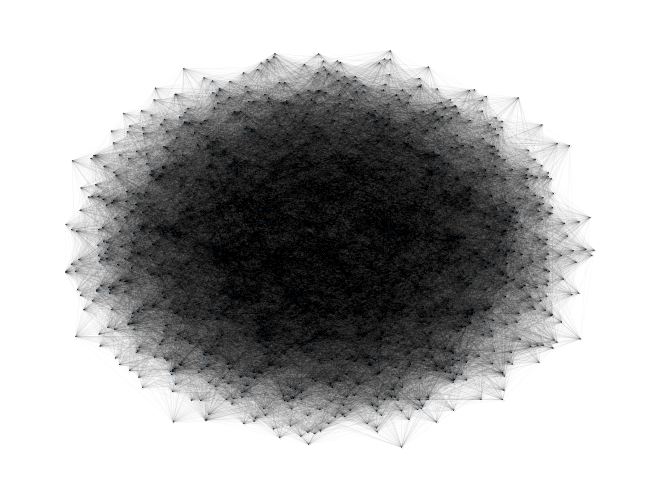

In [43]:
nx.draw_spring(g, node_size=0.01, width = 0.01)

After having defined the network, now we can select the diffusion model to simulate. First, we're going to import the `SIR` model. 

In [44]:
import ndlib.models.epidemics as ep

ModuleNotFoundError: No module named 'ndlib'

Now, let's set it up on our random network `g`.

In [ ]:
model = ep.SIRModel(g)

Every diffusion model has its own parameter, `NDlib` offers a common interface to specify them: `ModelConfig`.

`ModelConfig` takes care of validating model parameters.

Indeed, every model has its own parameters: model specific parameter list and definitions are available on the project [documentation site](http://ndlib.readthedocs.io).

In order to get a description of the required parameters just access the `parameter` field. 

The output should look something like this. 

```ipython

{
  "model": {
    "beta": {
      "descr": "Infection rate",
      "range": [
        0,
        1
      ],
      "optional": false
    },
    "gamma": {
      "descr": "Recovery rate",
      "range": [
        0,
        1
      ],
      "optional": false
    },
    "tp_rate": {
      "descr": "Whether if the infection rate depends on the number of infected neighbors",
      "range": [
        0,
        1
      ],
      "optional": true,
      "default": 1
    }
  },
  "nodes": {},
  "edges": {}
}

```

In [47]:
import json
print(json.dumps(model.parameters, indent=2))

NameError: name 'model' is not defined

Similarly, to obtain a list of the statuses implemented in the selected model just access the `available_statuses` field. 

Here, a person suspectible to a contagion is set to 0, a person who is infected is set as `1`, and someone subsequently removed from the network is set as `2`. 

In [48]:
model.available_statuses

NameError: name 'model' is not defined

Let's import the model configuration parameters. `ModelConfig` also allows to describe the initial condition of the simulation. It makes possible, for instance, to specify the initial percentage of infected nodes in the network.

In [49]:
import ndlib.models.ModelConfig as mc

ModuleNotFoundError: No module named 'ndlib'

First, let's set up the configuration. 

In [50]:
cfg = mc.Configuration()

NameError: name 'mc' is not defined

The parameter `beta` is the  rate of infection and the parameter `gamma` is the  rate of recovery. 

In [51]:
cfg.add_model_parameter('beta', 0.001) # infection rate
cfg.add_model_parameter('gamma', 0.01) # recovery rate

NameError: name 'cfg' is not defined

We can also set the initial conditions of how many people are already infected. 

In [ ]:
cfg.add_model_parameter("percentage_infected", 0.01)

Now, set these parameters to the model by passing in the configuration setup `cfg` and set it to the `model`. 

In [ ]:
model.set_initial_status(cfg)

***

### Running the Simulation Execution

Once the network and the diffusion model are set up with the initial conditoins, we can run the simulation.

`NDlib` models diffusive phenomena as **discrete-time**, **agent-based** processes. In other words, during every round, all nodes are evaluated and, their statuses are updated accordingly to the model rules.

Iterations can be required (incrementally) by using two methods:
- `iteration()`
- `iteration_bunch(nbunch, node_status=False)`

`iteration()` computes a single iteration step (e.g., one round), the latter executes `nbunch` number of iterations (e.g., multiple rounds). 

The `node_status` parameter returns the individual node status at each iteration, so you can see if their internal states (e.g., 0, 1, or 2) change in each round. 

Let's use `iteration_bunch()` so we can run a simulation for multiple rounds. In our case, let's go with 200! 

In [ ]:
iterations = model.iteration_bunch(200, node_status=True)

Alternatively, we can change the shape of the output data to just focus on the different states or `trends` using the `build_trends(iterations)` method:

In [ ]:
trends = model.build_trends(iterations)

You can find out which nodes are in which state (trend) with `trends` or you can see which nodes changed to which status using `status_delta`.

***

## Visualizing Results

Finally, `NDlib` allows to inspect the behavior of the simulated model using standard plots such as the `DiffusionTrend` and `DiffusionPrevalence` ones.

First, let's import the module. 

In [ ]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

Now, pass in the `model` and the output data from the simulation `trends`. 

In [ ]:
viz = DiffusionTrend(model, trends)
viz.plot()

Here, we can see the contagion spread, and the number of nodes that move from susceptible, to infected, to removed from the network. 

We can also plot the number of nodes that change from one state to another in each round. 

In [ ]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()

***

## Other Available Models

The analysis of diffusive phenomena that unfold on top of complex networks attracts growing interests from multiple fields of research.

In order to provide a succinct framing of such complex and extensively studied problem it is possible to split the related literature into two broad, related, sub-classes: **Epidemics** and **Opinion Dynamics**.

When we talk about epidemics, we think about contagious diseases caused by biological pathogens, like influenza, measles, chickenpox and sexually transmitted viruses that spread from person to person. 

Several elements determine the patterns by which epidemics spread through groups of people: the properties carried by the pathogen (its contagiousness, the length of its infectious period and its severity), the structure of the network as well as the mobility patterns of the people involved. 

In ``NDlib`` are implemented the following 12 Epidemic models:

<table>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/SIm.html'>SI</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/SIS.html'>SIS</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/SIR.html'>SIR</a></td>
    </tr>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/SEIR.html'>SEIR</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/SEIS.html'>SEIS</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/SWIR.html'>SWIR</a></td>
    </tr>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/Threshold.html'>Threshold</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/GeneralisedThreshold.html'>Generalised Threshold</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/KThreshold.html'>Kertesz Threshold</a></td>
    </tr>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/Profile.html'>Profile</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/ProfileThreshold.html'>Profile-Threshold</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/IndependentCascades.html'>Independent Cascades</a></td>
    </tr>
</table>

### Opinion Dynamics

A different field related with modelling social behavior is that of opinion dynamics.

Recent years have witnessed the introduction of a wide range of models that attempt to explain how opinions form in a population, taking into account various social theories.

These models have a lot in common with those seen in epidemics and spreading. In general, individuals are modelled as agents with a state and connected by a social network.

The social links can be represented by a complete network (i.e., *mean field* models) or by more realistic complex networks, similar to epidemics and spreading.

The state is typically represented by variables, that can be *discrete* (similar to the case of spreading), but also *continuous*, representing a probability to choose one option or another. The state of individuals changes in time, based on a set of update rules, mainly through interaction with the neighbors.

While in many spreading and epidemics models this change is irreversible (i.e., susceptible to infected), in opinion dynamics the state can oscillate freely between the possible values, simulating thus how opinions change in reality.

In `NDlib` are implemented the following 6 Opinion Dynamics models:

<table>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/opinion/Voter.html'>Voter</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/opinion/QVoter.html'>Q-Voter</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/opinion/MajorityRule.html'>Majority Rule</a></td>
    </tr>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/opinion/Snajzd.html'>Sznajd</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/opinion/COD.html'>Cognitive Opinion Dynamics</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/opinion/AlgorithmicBias.html'>Algorithmic Bias</a></td>
    </tr>
</table>

***
***

<div class="alert alert-block alert-success">

# Checkpoint 4

Now you try! 

Change the $\beta$ and the $\gamma$ parameters in the model: 
    
```ipython
cfg.add_model_parameter('beta', ADD_HERE) # infection rate
cfg.add_model_parameter('gamma', ADD_HERE) # recovery rate
model.set_initial_status(cfg)
```
    
re-run the model and re-create the two visualizations above (e.g., the number of nodes in each segment and the number of nodes that change between states or the "delta node" plot). 

***
***

<div class="alert alert-block alert-warning">

***Be sure to turn off your kernel before closing!***

<p style="text-align:center;">
        <img src=Images/Best_Practice.png width=500 class="center">
</p>

</div>